In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [6]:
data = pd.read_csv('data/manipRPM.txt', sep=';', names=['nowRPM', 'targetRPM', 'deg'])

In [7]:
data = data.dropna()
data = data[(np.abs(stats.zscore(data['nowRPM'])) < 3)]
data = data[(np.abs(stats.zscore(data['targetRPM'])) < 3)]
data['windowedRPM'] = data['nowRPM'].rolling(window=200).mean()

In [8]:
x_vals = data['deg']

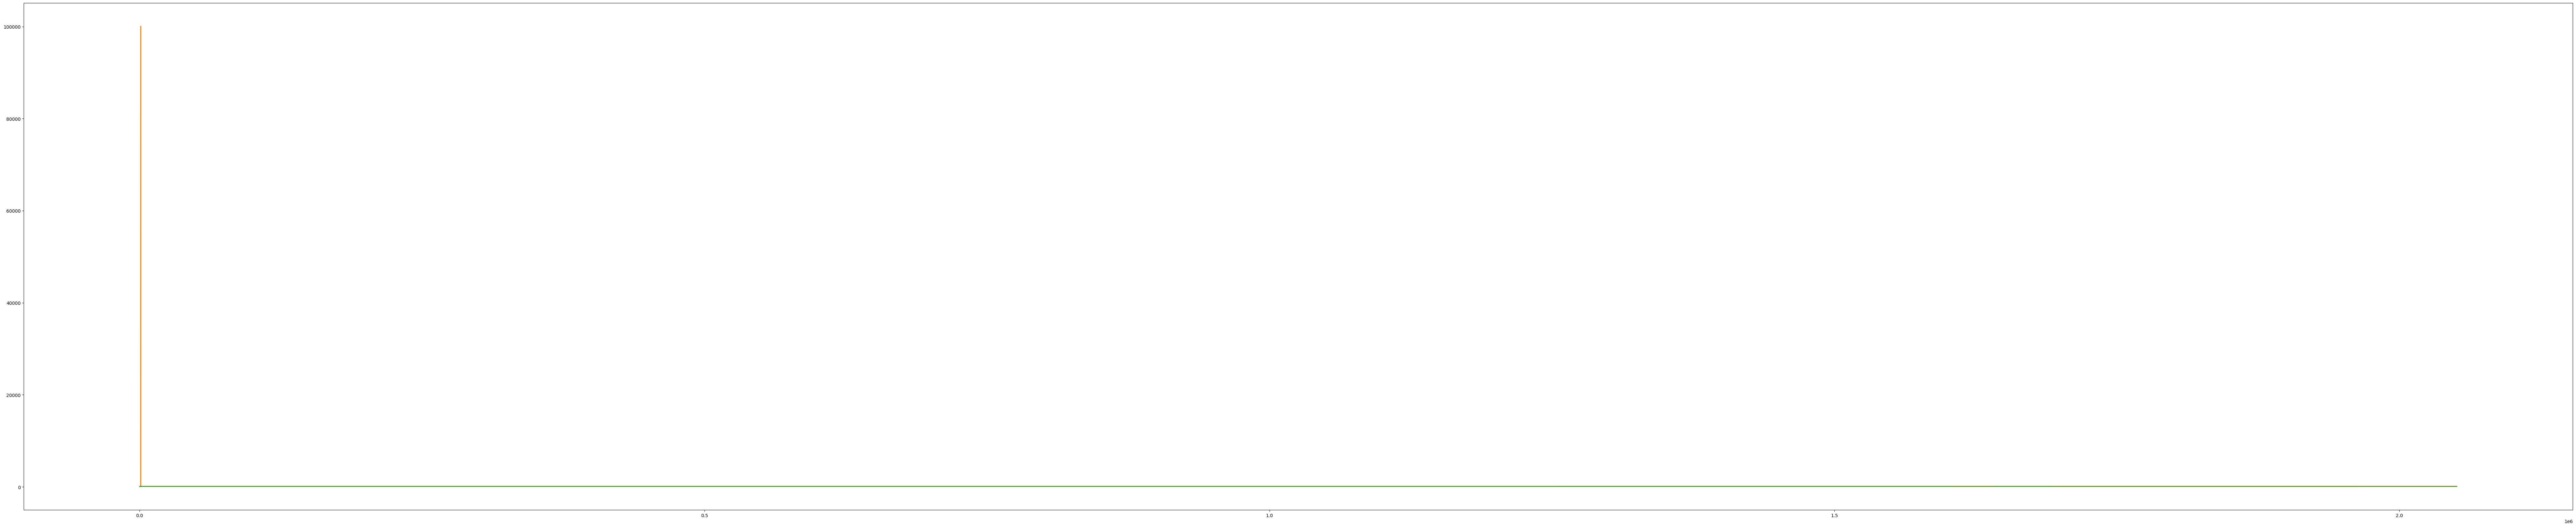

In [9]:
fig, ax = plt.subplots(figsize=(100, 20))
ax.plot(x_vals, data['nowRPM'], label='nowRPM')
ax.plot(x_vals, data['targetRPM'], label='targetRPM')
ax.plot(x_vals, data['windowedRPM'], label='windowedRPM')

In [10]:
data[data['nowRPM'] == data['targetRPM']].head(1)['deg']

4117    804.0
Name: deg, dtype: float64